<a href="https://colab.research.google.com/github/TheGreymanShow/pytorch-stochastic-gradient-descent-from-scratch/blob/master/Stochastic_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [2]:
def mse(y_pred, y_true):
    return np.sum((y_pred - y_true)**2) / len(y_true)

In [ ]:
a = np.array([2,2,2,2])
b = np.array([1,1,1,1])

print(mse(a,b))

1.0


In [131]:
def generating_dataset_for_regression(noise, n_samples):
    X, y, z = make_regression(n_samples, n_features=1, noise=noise, coef = True)
    X = pd.Series([x[0] for x in X])
    Y = pd.Series(y)
    return [X, Y, z]

In [132]:
def next_batch(X, y, batchSize):
	# loop over our dataset `X` in mini-batches of size `batchSize`
	for i in np.arange(0, X.shape[0], batchSize):
		# yield a tuple of the current batched data and labels
		yield (X[i:i + batchSize], y[i:i + batchSize])

In [134]:
X, Y, true_coef  = generating_dataset_for_regression(1, 640)

z = next_batch(X, Y, 32)

count=0
for _ in z:
  count+=1

print(count)

20


In [144]:
# Building the model for ols using gradient descent
def gradient_descent_ols(X, Y, init_weights, learning_rate, max_epochs):
    w0 = init_weights[0]
    w1 = init_weights[1]

    L = learning_rate  # The learning Rate
    epochs = max_epochs  # The number of iterations to perform gradient descent

    n = float(len(Y)) # Number of elements in dataset

    loss = []

    # Performing Gradient Descent 
    for epoch in range(epochs):
      epochLoss = []

      for (batch_X, batch_Y) in next_batch(X, Y, 8):

        Y_pred = (w1*batch_X) + w0    # The current predicted value of Y

        D_w0 = 2 * sum(Y_pred - batch_Y) / 8               # Derivative wrt w0
        D_w1 = 2 * sum(batch_X * (Y_pred - batch_Y)) / 8   # Derivative wrt w1
 
        w0 = w0 - L * D_w0  # Update w0
        w1 = w1 - L * D_w1  # Update w1

        error = mse(Y_pred, Y)
        epochLoss.append(error)
      
      loss.append(np.average(epochLoss))

    return loss

In [59]:
#c closed form
def closed_form_ols(X, y):
    X0 = np.ones(len(X))
    mat_A = np.column_stack(( X0, X))
    return np.linalg.inv(mat_A.T @ mat_A) @ mat_A.T @ y

In [145]:
#generate 5 datasets
datasets = []
for i in range(1):
    X, Y, true_coef  = generating_dataset_for_regression(0, 104)
    print("true coef for dataset ",i ,"is : ",true_coef)
    datasets.append([X, Y])

true coef for dataset  0 is :  18.685505747030206


In [168]:
for X, target in datasets:
    loss = gradient_descent_ols(X, target, [0, 0, 0], 0.001, 5000)
    loss2 = gradient_descent_ols(X, target, [0, 0, 0], 0.0001, 5000)

In [161]:
for X, target in datasets:
 

In [96]:
print(len(loss))

500


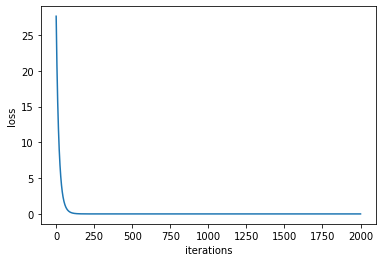

In [171]:
import matplotlib.pyplot as plt
y = loss[:2000]
x = np.arange(1, 2001, 1)
plt.plot(x, y)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.show()

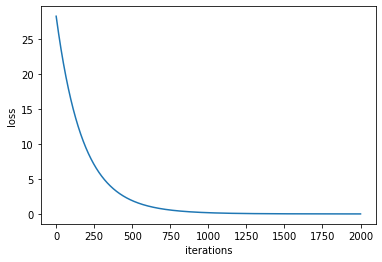

In [172]:
import matplotlib.pyplot as plt
import math

y = loss2[:2000]
x = np.arange(1, 2001, 1)
plt.plot(x, y)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.show()

In [119]:
loss2[-10:]

[26.85764937369315,
 26.854784844692656,
 26.851923852432563,
 26.84906639234838,
 26.846212459881805,
 26.84336205048069,
 26.840515159599025,
 26.83767178269704,
 26.83483191524109,
 26.831995552703628]